In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib
import matplotlib.lines as mlines

In [109]:
def create_list_to_plot(acc_cost_pairs, label,marker, color ,marker_label):
    list_to_plot = []
    for acc_cost_pair in acc_cost_pairs:
        acc = acc_cost_pair[0]
        cost = acc_cost_pair[1]
        ece = acc_cost_pair[2]
        inef =  acc_cost_pair[3]
        alpha = 100-acc_cost_pair[4]
        dict_point = {'label':label, 'cost': cost, 'gated_acc':acc, 'gated_ece':ece, 'inef':inef,'alpha':alpha, 'marker': marker, 'color':color, 'marker_label': marker_label}
        list_to_plot.append(dict_point)
    return list_to_plot

In [168]:
boosted_acc_pairs = [
# [39.040, 14.92, 27.57, 6.55, 94.80],  
# [40.180, 15.60, 28.67, 6.51, 94.90],  
# [41.460, 16.43, 29.90, 6.43, 95.05],  
# [43.310, 17.67, 31.66, 6.26, 95.08],  
# [45.420, 19.08, 33.64, 6.03, 95.01],  
# [47.680, 20.56, 35.76, 5.85, 95.12],  
# [50.610, 22.49, 38.49, 5.53, 95.07],  
# [53.320, 24.50, 40.96, 5.23, 95.09],  
# [57.520, 27.29, 44.81, 4.81, 95.17],  
# [61.450, 30.01, 48.38, 4.46, 95.34],  
# [64.660, 32.45, 51.25, 4.09, 95.29],  
# [68.670, 35.86, 54.77, 3.62, 95.22],  
[72.100, 38.89, 57.77, 3.23, 95.22],  
[75.030, 41.61, 60.30, 2.86, 95.07],  
[77.400, 44.23, 62.31, 2.62, 95.23],  
[79.870, 46.78, 64.42, 2.36, 95.19],  
[82.120, 49.56, 66.28, 2.06, 94.99],  
[83.940, 52.09, 67.76, 1.96, 95.59],  
[85.720, 54.62, 69.21, 1.75, 95.63],  
[87.170, 56.89, 70.38, 1.64, 95.84],  
[88.460, 58.98, 71.41, 1.42, 95.33],  
[89.530, 60.94, 72.25, 1.33, 95.12],  
[90.250, 62.46, 72.81, 1.27, 95.17],  
[91.000, 64.04, 73.40, 1.20, 95.28],  
[91.590, 65.41, 73.85, 1.15, 95.05],  
[92.050, 66.71, 74.19, 1.14, 95.40],  
[92.430, 67.81, 74.48, 1.11, 95.30],  
[92.910, 69.01, 74.85, 1.09, 95.35],  
[93.200, 69.90, 75.07, 1.08, 95.55],  
[93.360, 70.67, 75.16, 1.07, 95.50],  
[93.480, 71.35, 75.24, 1.06, 95.57],  
[93.660, 72.07, 75.37, 1.06, 95.64],  
[93.800, 72.69, 75.46, 1.05, 95.73],  
[93.900, 73.23, 75.53, 1.05, 95.71],  
[94.090, 73.83, 75.68, 1.05, 95.85],  
[94.120, 74.14, 75.69, 1.05, 95.87],  
[94.290, 74.83, 75.81, 1.04, 95.84],  
[94.330, 75.24, 75.83, 1.03, 95.75],  
[94.410, 75.59, 75.89, 1.03, 95.83]]
label = 'boosted'
marker_label = 'boosted'
color = 'c'
marker = '.'
boosted_list_dict = create_list_to_plot(boosted_acc_pairs, label,marker, color ,marker_label)

In [169]:
app4 = [
    #[54.1, 24.5,13.9 , 4.8,94.6 ],
        [83.3, 49.7, 12.1, 1.8,94.6 ],
        [88.2,55.6,9.6,1.4,95.3],
        [90.7,59.6,7.5,1.2,95.2], 
        [91.4,61.4, 6.7,1.18,95.5],
        [92.0,62.9,6.3,1.14,95.2],
        [92.5,63.9,5.7,1.13,95],
        [93.1,66.3, 4.8, 1.11,95.4 ]]
label = 'Ours.'
marker_label = 'Ours.'
color = 'b'
marker = '^'
our_4results = create_list_to_plot(app4, label,marker, color ,marker_label)

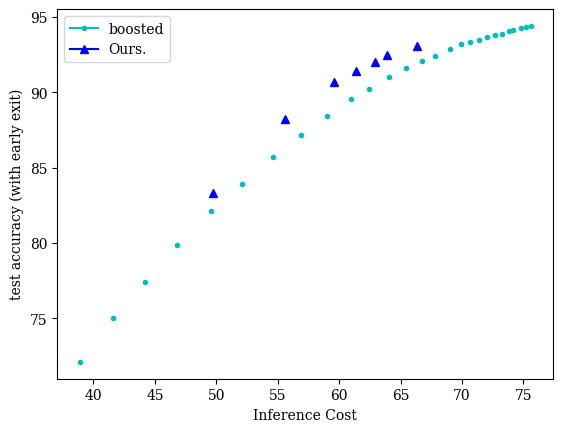

In [170]:
font = {'family' : 'serif',
        'size'   : 10}

combined_dicts = boosted_list_dict+our_4results
matplotlib.rc('font', **font)

fig = plt.figure()
ax = plt.subplot(111)
legend_patches_dict = {}
for dict_of_result in combined_dicts:
    label = dict_of_result['label']
    marker_label = dict_of_result['marker_label']
    cost = dict_of_result['cost']
    marker = dict_of_result['marker']
    gated_acc = dict_of_result['gated_acc']
    if not marker_label in legend_patches_dict.keys():
        legend_patches_dict[marker_label] = {'color': dict_of_result['color'], 'marker': marker}
    ax.plot(cost, gated_acc, marker, color=dict_of_result['color'])
# fig.xlabel('- inference cost')
patches = []
for patch in legend_patches_dict.keys():
    patches.append(mlines.Line2D([], [], color=legend_patches_dict[patch]['color'], marker = legend_patches_dict[patch]['marker'], label=patch))
ax.legend(handles=patches)
ax.set_xlabel('Inference Cost')
ax.set_ylabel('test accuracy (with early exit)')
# ax.legend(bbox_to_anchor=(1.1, 1.05, 0.5, 0.2))
ax.set_in_layout(in_layout=True)

plt.savefig('perf_cost_app1vs3.pdf')

In [171]:
plt.close()

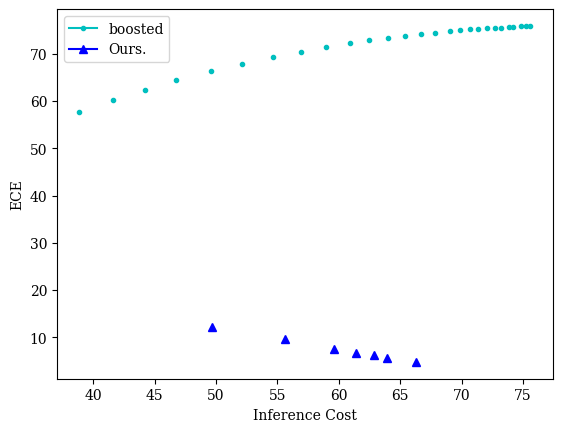

In [172]:

fig = plt.figure()
ax = plt.subplot(111)
legend_patches_dict = {}
for dict_of_result in combined_dicts:
    label = dict_of_result['label']
    marker_label = dict_of_result['marker_label']
    cost = dict_of_result['cost']
    marker = dict_of_result['marker']
    gated_ece = dict_of_result['gated_ece']
    if not marker_label in legend_patches_dict.keys():
        legend_patches_dict[marker_label] = {'color': dict_of_result['color'], 'marker': marker}
    ax.plot(cost, gated_ece, marker, color=dict_of_result['color'])
# fig.xlabel('- inference cost')
patches = []
for patch in legend_patches_dict.keys():
    patches.append(mlines.Line2D([], [], color=legend_patches_dict[patch]['color'], marker = legend_patches_dict[patch]['marker'], label=patch))
ax.legend(handles=patches)
ax.set_xlabel('Inference Cost')
ax.set_ylabel('ECE')
# ax.legend(bbox_to_anchor=(1.1, 1.05, 0.5, 0.2))
ax.set_in_layout(in_layout=True)

plt.savefig('ece_cost.pdf')

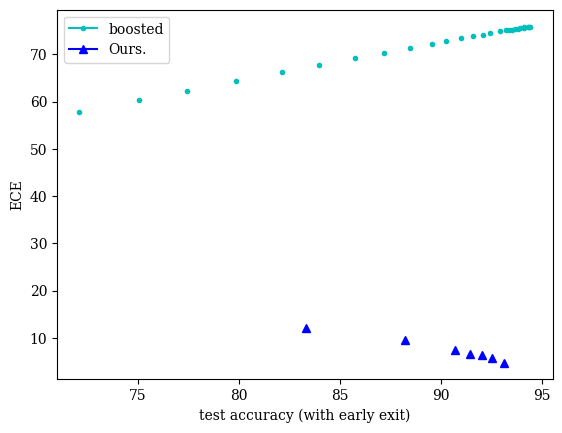

In [173]:

matplotlib.rc('font', **font)
fig = plt.figure()
ax = plt.subplot(111)
legend_patches_dict = {}
for dict_of_result in combined_dicts:
    label = dict_of_result['label']
    marker_label = dict_of_result['marker_label']
    gated_acc = dict_of_result['gated_acc']
    marker = dict_of_result['marker']
    gated_ece = dict_of_result['gated_ece']
    if not marker_label in legend_patches_dict.keys():
        legend_patches_dict[marker_label] = {'color': dict_of_result['color'], 'marker': marker}
    ax.plot(gated_acc, gated_ece, marker, color=dict_of_result['color'])
# fig.xlabel('- inference cost')
patches = []
for patch in legend_patches_dict.keys():
    patches.append(mlines.Line2D([], [], color=legend_patches_dict[patch]['color'], marker = legend_patches_dict[patch]['marker'], label=patch))
ax.legend(handles=patches)
ax.set_xlabel('test accuracy (with early exit)')
ax.set_ylabel('ECE')
# ax.legend(bbox_to_anchor=(1.1, 1.05, 0.5, 0.2))
ax.set_in_layout(in_layout=True)

plt.savefig('acc_ece.pdf')

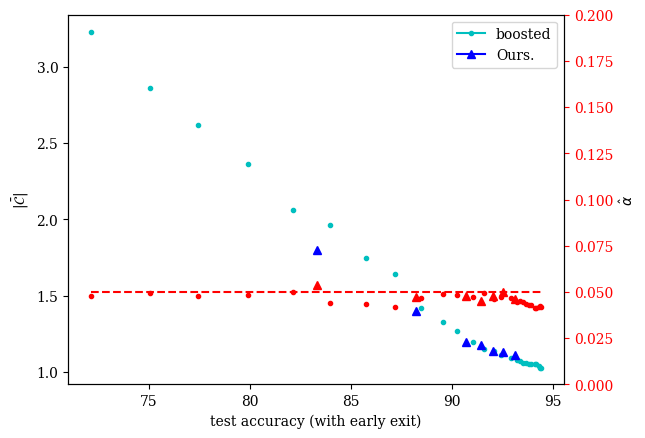

In [174]:
matplotlib.rc('font', **font)
fig = plt.figure()
ax = plt.subplot(111)
ax2=ax.twinx()
legend_patches_dict = {}
min_x = np.inf
max_x = -np.inf
for dict_of_result in combined_dicts:
    label = dict_of_result['label']
    marker_label = dict_of_result['marker_label']
    gated_acc = dict_of_result['gated_acc']
    marker = dict_of_result['marker']
    gated_inef = dict_of_result['inef']
    alpha = dict_of_result['alpha']/100
    if not marker_label in legend_patches_dict.keys():
        legend_patches_dict[marker_label] = {'color': dict_of_result['color'], 'marker': marker}
    ax.plot(gated_acc, gated_inef, marker, color=dict_of_result['color'])
    ax2.plot(gated_acc, alpha, marker, color='r')
    min_x = np.min(gated_acc) if min_x> np.min(gated_acc) else  min_x
    max_x = np.max(gated_acc) if max_x< np.max(gated_acc) else  max_x
# fig.xlabel('- inference cost')
patches = []
ax2.set_ylim([0, 0.2])
ax2.hlines(0.05, min_x, max_x, color='r', linestyles='dashed')
ax2.set_ylabel(r'$\hat{\alpha}$')
ax2.tick_params(axis='y', colors='red')
for patch in legend_patches_dict.keys():
    patches.append(mlines.Line2D([], [], color=legend_patches_dict[patch]['color'], marker = legend_patches_dict[patch]['marker'], label=patch))
ax.legend(handles=patches)
ax.set_xlabel('test accuracy (with early exit)')
ax.set_ylabel(r'$\bar{|\mathcal{C}|}$')
# ax.legend(bbox_to_anchor=(1.1, 1.05, 0.5, 0.2))
ax.set_in_layout(in_layout=True)

plt.savefig('acc_inef.pdf')

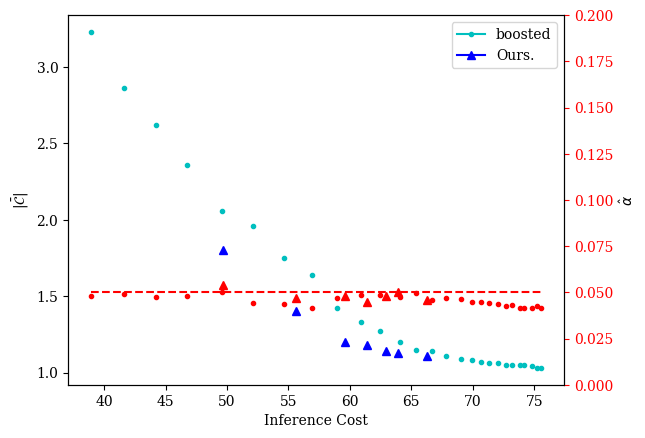

In [175]:
fig = plt.figure()
ax = plt.subplot(111)
legend_patches_dict = {}
min_x = np.inf
max_x = -np.inf
ax2=ax.twinx()
for dict_of_result in combined_dicts:
    label = dict_of_result['label']
    marker_label = dict_of_result['marker_label']
    cost = dict_of_result['cost']
    marker = dict_of_result['marker']
    gated_inef = dict_of_result['inef']
    alpha = dict_of_result['alpha']/100
    if not marker_label in legend_patches_dict.keys():
        legend_patches_dict[marker_label] = {'color': dict_of_result['color'], 'marker': marker}
    ax.plot(cost, gated_inef, marker, color=dict_of_result['color'])
    ax2.plot(cost, alpha, marker, color='r')
    min_x = np.min(cost) if min_x> np.min(cost) else  min_x
    max_x = np.max(cost) if max_x< np.max(cost) else  max_x
# fig.xlabel('- inference cost')
ax2.set_ylim([0, 0.2])
ax2.hlines(0.05, min_x, max_x, color='r', linestyles='dashed')
patches = []
for patch in legend_patches_dict.keys():
    patches.append(mlines.Line2D([], [], color=legend_patches_dict[patch]['color'], marker = legend_patches_dict[patch]['marker'], label=patch))
ax.legend(handles=patches)
ax2.set_ylabel(r'$\hat{\alpha}$')
ax2.tick_params(axis='y', colors='red')
ax.set_xlabel('Inference Cost')
ax.set_ylabel(r'$\bar{|\mathcal{C}|}$')
# ax.legend(bbox_to_anchor=(1.1, 1.05, 0.5, 0.2))
ax.set_in_layout(in_layout=True)

plt.savefig('inef_cost.pdf')